# Meat Consumption Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
dMeat = pd.read_csv(r"C:\Users\Ahmad1\Documents\GitHub\ie423-2024-termproject-the-a-team\DataSets\MeatConsumption\meat_consumption_worldwide.csv")

In [3]:
print("Columns within the data-set:")
dMeat.columns

Columns within the data-set:


Index(['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value'], dtype='object')

In [4]:
print(dMeat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB
None


In [5]:
dMeat.dtypes

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object

In [6]:
dMeat.sample(10)

,LOCATION,SUBJECT,MEASURE,TIME,Value
3495,KAZ,SHEEP,KG_CAP,1996,9.245658
1601,BGD,SHEEP,KG_CAP,2005,1.058980
429,JPN,SHEEP,KG_CAP,2014,0.141514
13243,PRY,PIG,THND_TONNE,2024,200.966463
622,MEX,BEEF,KG_CAP,2024,8.930160
12065,PRY,POULTRY,THND_TONNE,2009,37.000000
5387,THA,POULTRY,KG_CAP,2010,8.365619
5507,UKR,PIG,KG_CAP,2023,13.841177
10569,MYS,BEEF,THND_TONNE,2015,236.000000
151,CAN,BEEF,KG_CAP,1995,23.201232


In [7]:
dMeat.shape

(13760, 5)

In [8]:
dMeat.index

RangeIndex(start=0, stop=13760, step=1)

### Missing Values: 
Checking for missing values in each column.

In [9]:
missingvals = dMeat.isnull().sum()
print(missingvals)

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64


### Check for Duplicate Rows:
Checking for duplicate values in each row.

In [10]:
duplicate_rows  = dMeat[dMeat.duplicated()]
# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows )
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [11]:
# Check data types of each column
print(dMeat.dtypes)

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object


In [12]:
# Count unique values in each column
unique_counts = dMeat.nunique()
print(unique_counts)

# List of columns to inspect
columns_to_inspect = ['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = dMeat[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

LOCATION       48
SUBJECT         4
MEASURE         2
TIME           37
Value       11383
dtype: int64
Unique values in column 'LOCATION':
['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']


Unique values in column 'SUBJECT':
['BEEF' 'PIG' 'POULTRY' 'SHEEP']


Unique values in column 'MEASURE':
['KG_CAP' 'THND_TONNE']


Unique values in column 'TIME':
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2024 2025 2026 1990]


Unique values in column 'Value':
[27.72181548 26.19959097 26.1690941  ... 45.6121072  46.32531235
 47.04720671]




In [13]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = dMeat[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'LOCATION':
LOCATION
MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: count, dtype: int64


Value counts for column 'SUBJECT':
SUBJECT
POULTRY    3457
SHEEP      3457
PIG        3447
BEEF       3399
Name: count, dtype: int64


Value counts for column 'MEASURE':
MEASURE
THND_TONNE    7042
KG_CAP        6718
Name: count, dtype: int64


Value counts for column 'TIME':
TIME
2009    376
2017    37

In [14]:
meat_type = dMeat['SUBJECT']
locations = dMeat['LOCATION']

unique_meat_types= dMeat["SUBJECT"].unique()
meat_counts = len(dMeat["SUBJECT"].unique())

total_meat_count = len(dMeat)

locations = dMeat['LOCATION'].unique()
locations_counts = len(dMeat['LOCATION'].unique())


# Dictionary to store percentages
meat_percentages = {}

# Loop through each unique meat type
for meat_type in unique_meat_types:
    # Count occurrences of the current meat type
    meat_type_count = (dMeat['SUBJECT'] == meat_type).sum()
    
    # Calculate percentage
    percentage = (meat_type_count / total_meat_count) * 100
    
    # Store percentage in the dictionary
    meat_percentages[meat_type] = percentage



In [15]:
print("Unique meat types:")
print(unique_meat_types)
print("in these locations:")
print(locations)
print("Which is " + str(meat_counts) + " types of meat studied across " + str(locations_counts) + " different locations.")

Unique meat types:
['BEEF' 'PIG' 'POULTRY' 'SHEEP']
in these locations:
['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']
Which is 4 types of meat studied across 48 different locations.


### Percentage of each type of Meat
Each percentage represents the proportion of that meat type compared to the total count of meat types.

In [16]:
print("Percentage of each type of meat:")
print(meat_percentages)

Percentage of each type of meat:
{'BEEF': 24.70203488372093, 'PIG': 25.05087209302326, 'POULTRY': 25.123546511627907, 'SHEEP': 25.123546511627907}


### Mean value for different types of Meat

In [17]:
# Dictionary to store mean values for each meat type
mean_values = {}

# Loop through each unique meat type
for meat_type in unique_meat_types:
    # Filter the DataFrame for the current meat type
    meat_data = dMeat[dMeat['SUBJECT'] == meat_type]
    
    # Calculate the mean of the 'Value' column for the current meat type
    mean_value = meat_data['Value'].mean()
    
    # Store the mean value in the dictionary
    mean_values[meat_type] = mean_value

# Print the mean values for each meat type
for meat_type, mean_value in mean_values.items():
    print("Mean value for", meat_type, ":", mean_value)


Mean value for BEEF : 1570.6065160570358
Mean value for PIG : 3014.252668041042
Mean value for POULTRY : 2519.348987412063
Mean value for SHEEP : 341.0462123008968


### Defining Outliers

In [18]:
#  Identify outliers using summary statistics (for numerical columns)
dMeat.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


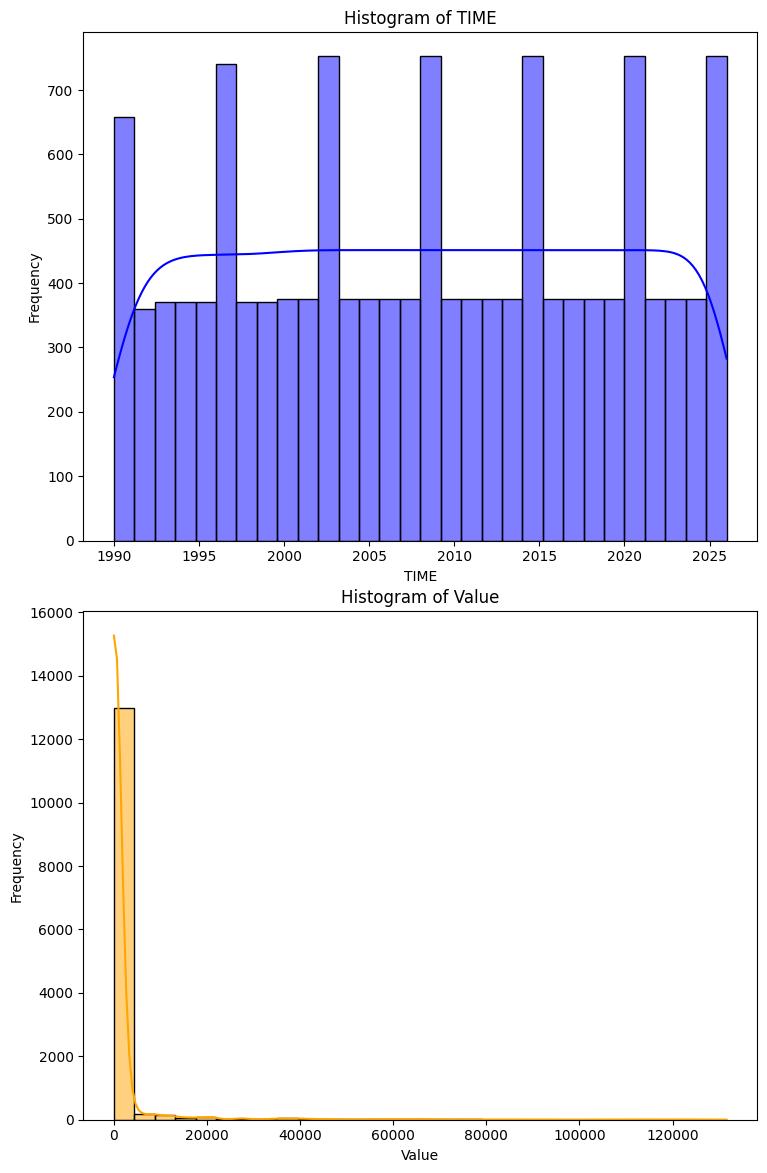

In [19]:
# Select numerical columns for histogram plotting
numerical_columns = ['TIME', 'Value']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Define colors for histograms
colors = ['blue', 'orange']

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(dMeat[col], bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


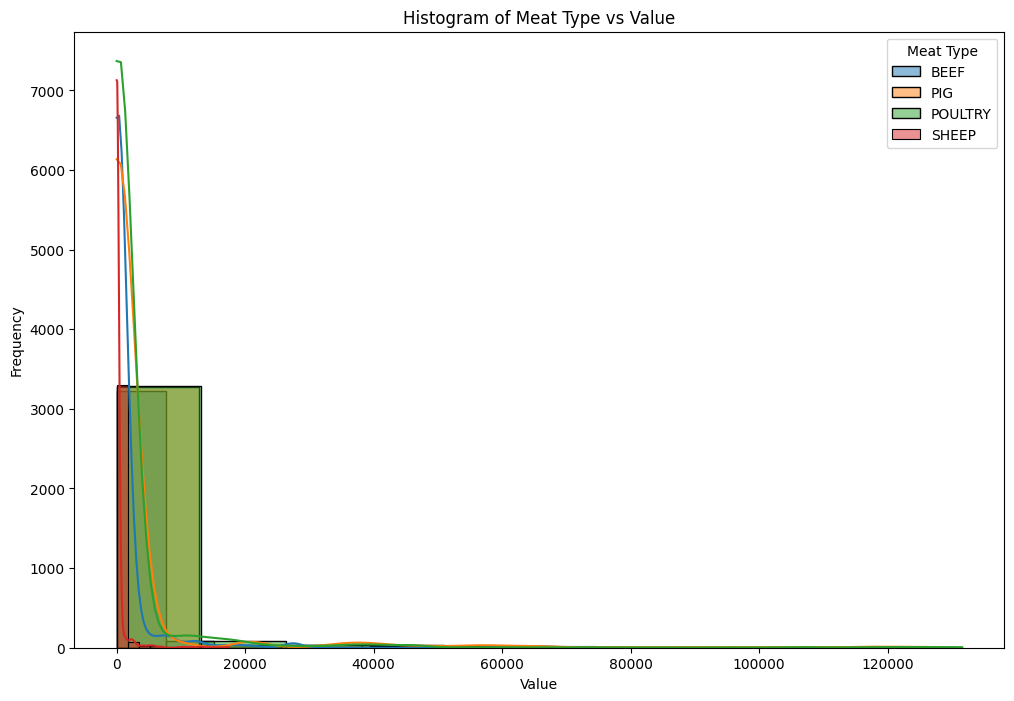

In [20]:
# Plot histogram
plt.figure(figsize=(12, 8))
for meat_type in dMeat['SUBJECT'].unique():
    sns.histplot(data=dMeat[dMeat['SUBJECT'] == meat_type], x='Value', bins=10, kde=True, label=meat_type)
plt.title('Histogram of Meat Type vs Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Meat Type', loc='upper right')
plt.show()


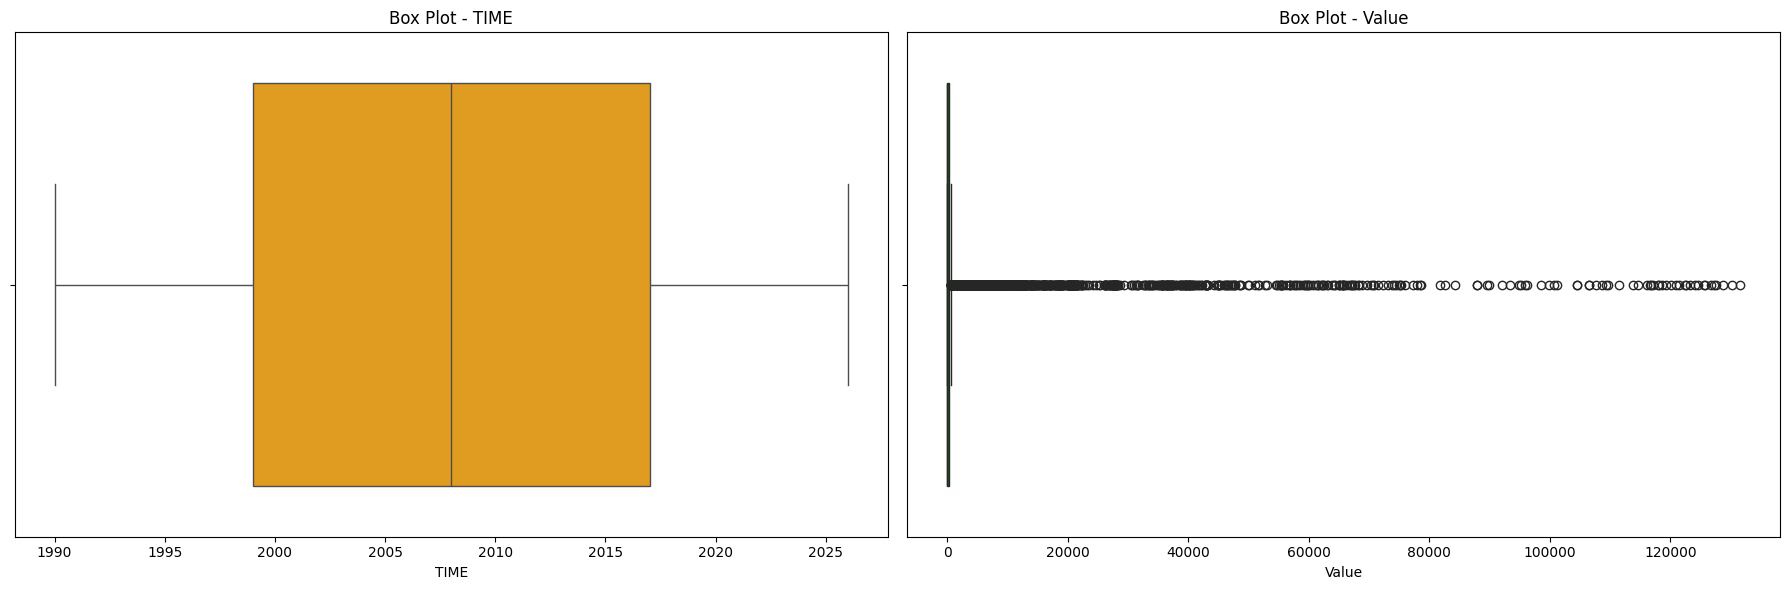

In [21]:
# Box plots 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for 'TIME'
sns.boxplot(x=dMeat['TIME'], ax=axs[0], color= 'orange')
axs[0].set_title('Box Plot - TIME')

# Box plot for 'Value'
sns.boxplot(x=dMeat['Value'], ax=axs[1], color='green')
axs[1].set_title('Box Plot - Value')

# Adjust layout
plt.tight_layout()
plt.show()


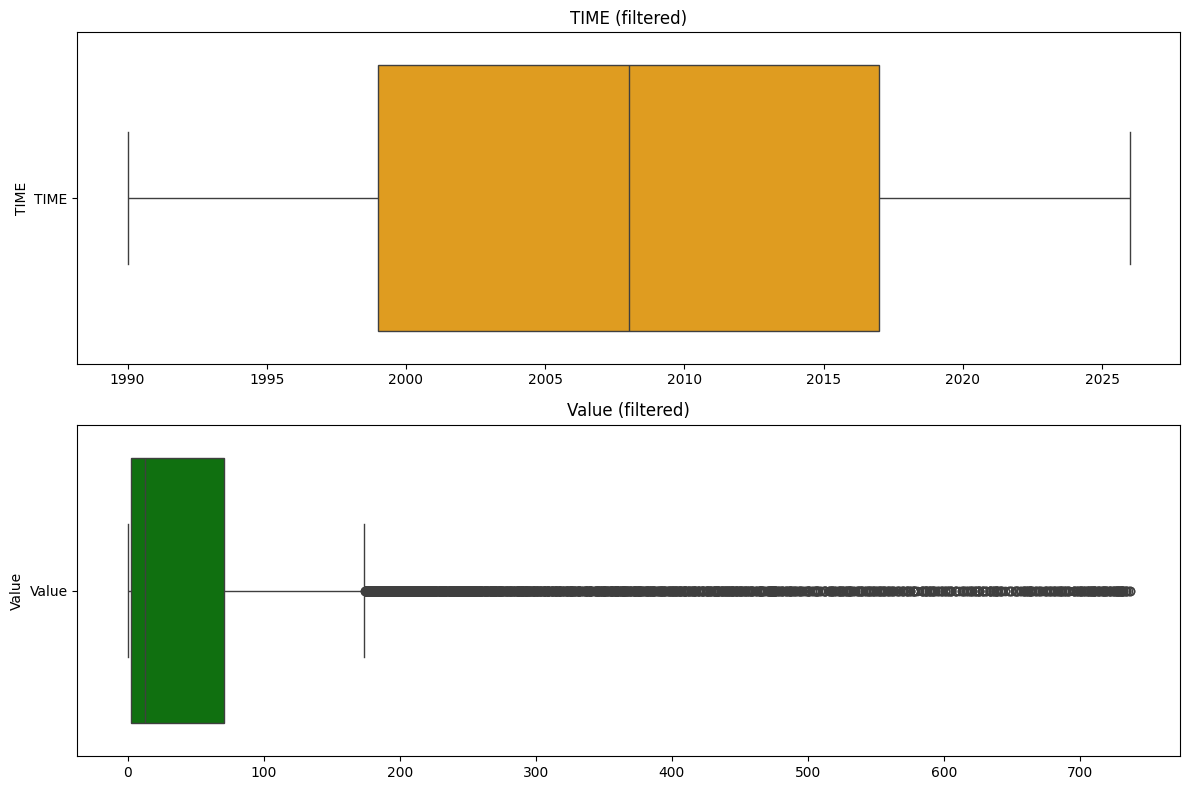

In [22]:
# Calculate quartiles and IQR for 'TIME' and 'Value' columns
Q1_time = dMeat['TIME'].quantile(0.25)
Q3_time = dMeat['TIME'].quantile(0.75)
IQR_time = Q3_time - Q1_time

Q1_value = dMeat['Value'].quantile(0.25)
Q3_value = dMeat['Value'].quantile(0.75)
IQR_value = Q3_value - Q1_value

# Define bounds for 'TIME' and 'Value' columns
lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time

lower_bound_value = Q1_value - 1.5 * IQR_value
upper_bound_value = Q3_value + 1.5 * IQR_value

# Filtering out the outliers for 'TIME' and 'Value' columns
filtered_df = dMeat[(dMeat['TIME'] >= lower_bound_time) & (dMeat['TIME'] <= upper_bound_time) &
                     (dMeat['Value'] >= lower_bound_value) & (dMeat['Value'] <= upper_bound_value)]
# Shows new boxplots for filtered data
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)  # Change subplot layout to vertical
sns.boxplot(data=filtered_df[['TIME']], color='orange', orient='h')
plt.title('TIME (filtered)')
plt.ylabel('TIME')  

plt.subplot(2, 1, 2)  # Change subplot layout to vertical
sns.boxplot(data=filtered_df[['Value']], color='green', orient='h') 
plt.title('Value (filtered)')
plt.ylabel('Value') 

plt.tight_layout()
plt.show()


In [23]:
filtered_df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [24]:
filtered_df.describe()

,TIME,Value
count,11418.000000,1.141800e+04
mean,2007.753372,8.179345e+01
std,10.638401,1.498702e+02
min,1990.000000,1.669000e-09
25%,1999.000000,2.429570e+00
50%,2008.000000,1.305203e+01
75%,2017.000000,7.109541e+01
max,2026.000000,7.367261e+02


In [25]:
# We can still seem to see outliers after filtering data so transformation and scaling will be needed.
print(filtered_df.dtypes)

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object


In [26]:
# Define categorical columns for encoding
categorical_columns = ['LOCATION', 'SUBJECT', 'MEASURE']

# Apply one-hot encoding using pandas and get_dummies
final_df = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)

# Check the updated DataFrame with one-hot encoded columns
print(final_df.head())

   TIME      Value  LOCATION_AUS  LOCATION_BGD  LOCATION_BRA  LOCATION_BRICS  \
0  1991  27.721815          True         False         False           False   
1  1992  26.199591          True         False         False           False   
2  1993  26.169094          True         False         False           False   
3  1994  25.456134          True         False         False           False   
4  1995  25.340226          True         False         False           False   

   LOCATION_CAN  LOCATION_CHE  LOCATION_CHL  LOCATION_CHN  ...  LOCATION_URY  \
0         False         False         False         False  ...         False   
1         False         False         False         False  ...         False   
2         False         False         False         False  ...         False   
3         False         False         False         False  ...         False   
4         False         False         False         False  ...         False   

   LOCATION_USA  LOCATION_VNM  LOCATIO

In [27]:
final_df.head()

,TIME,Value,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,LOCATION_CHL,LOCATION_CHN,...,LOCATION_URY,LOCATION_USA,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP,MEASURE_THND_TONNE
0,1991,27.721815,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1992,26.199591,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1993,26.169094,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1994,25.456134,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1995,25.340226,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


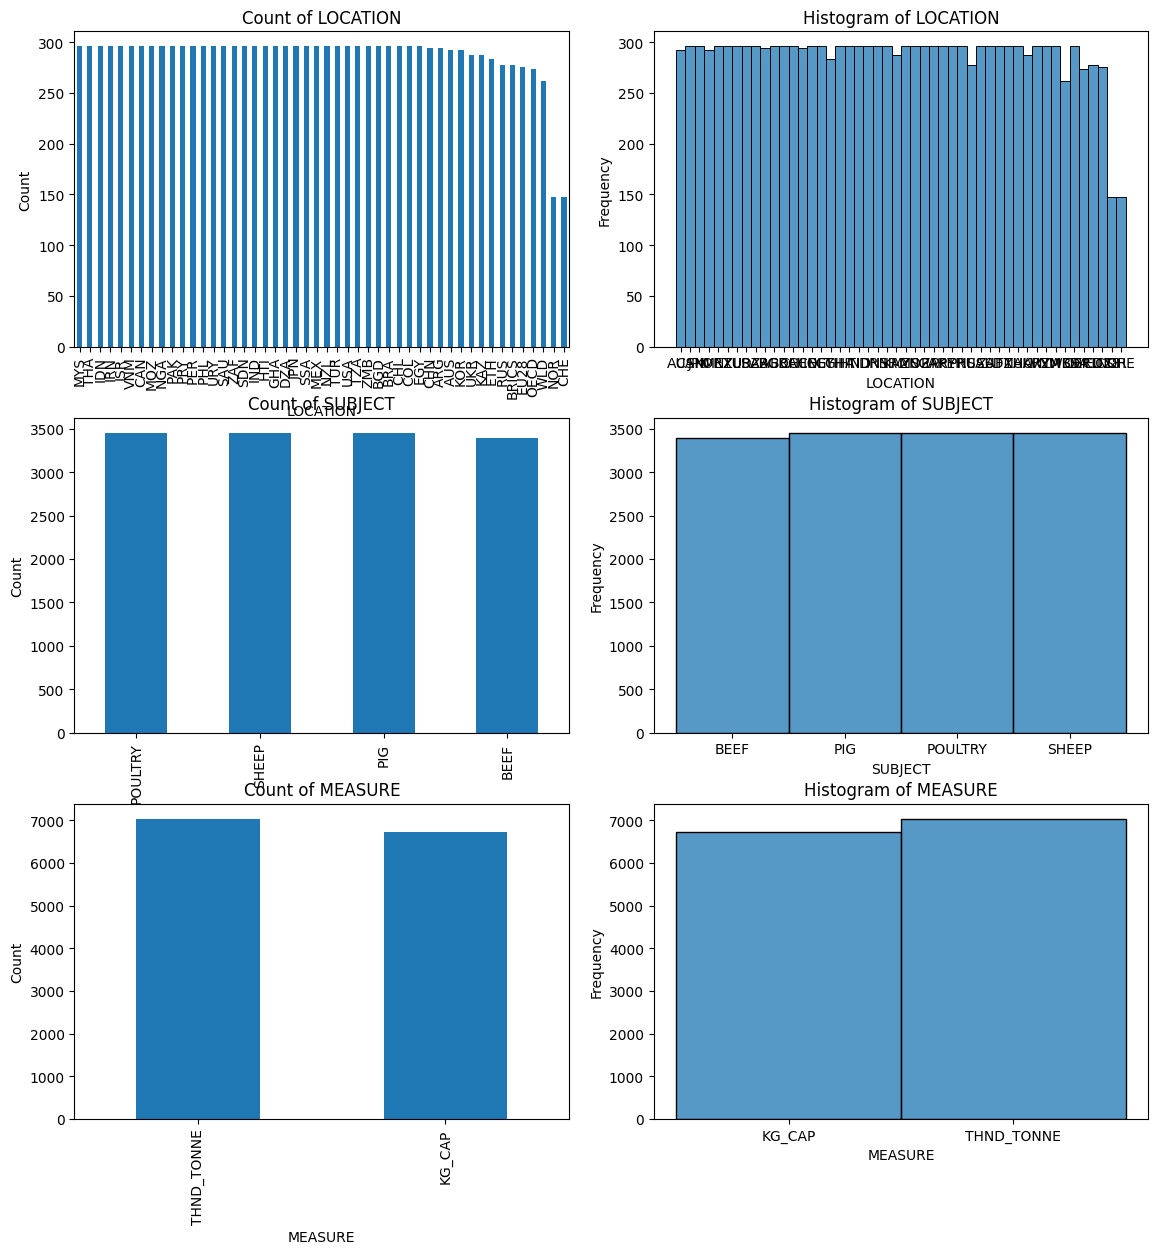

In [28]:
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(12, 12))
fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Plot histograms for each categorical column
for i, col in enumerate(categorical_columns):
    # Compute value counts
    value_counts = dMeat[col].value_counts()
    
    # Plot histogram
    ax = axes[i, 0]
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Plot categorical distribution
    ax = axes[i, 1]
    sns.histplot(dMeat[col], ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()


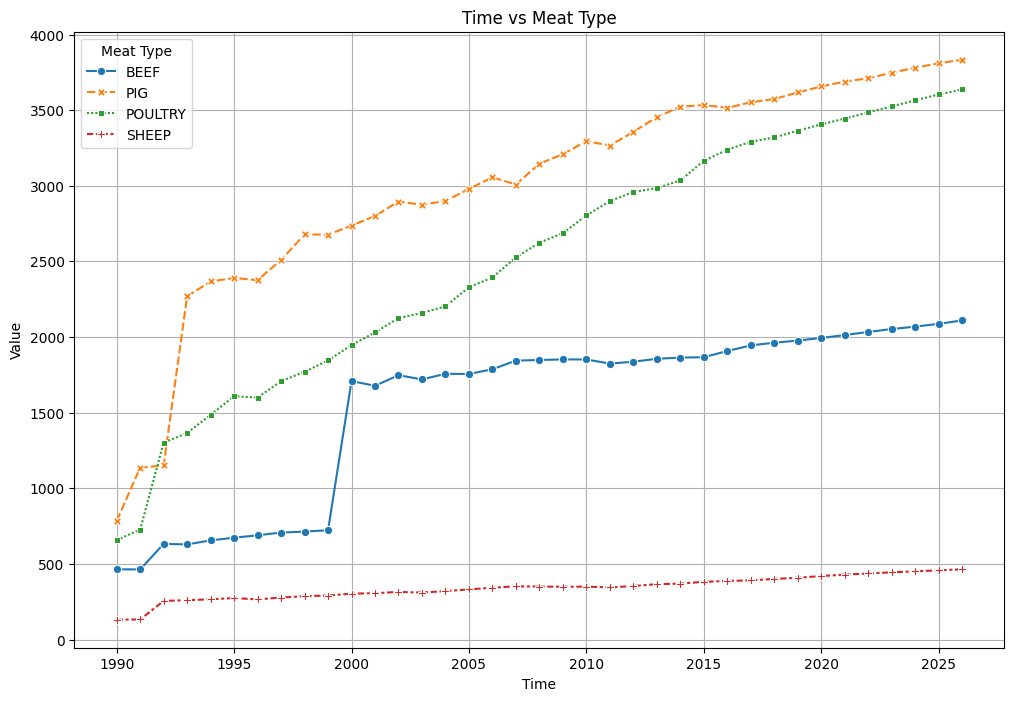

In [30]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dMeat, x='TIME', y='Value', hue='SUBJECT', errorbar=None, markers=True, style='SUBJECT')
plt.title('Time vs Meat Type')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Meat Type', loc='upper left')
plt.grid(True)
plt.show()


Covariance between 'Value' and 'TIME': 5359.410804604124


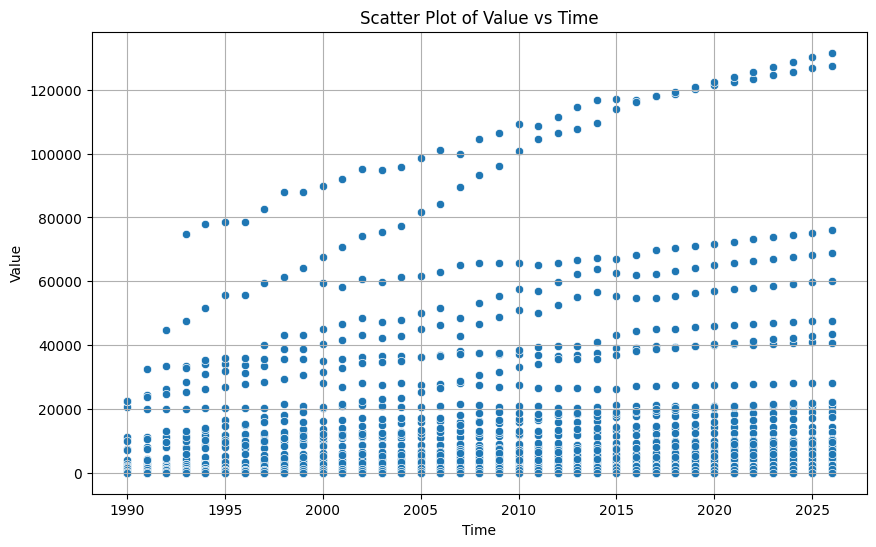

In [31]:
# Calculate covariance
covariance = dMeat['Value'].cov(dMeat['TIME'])
print("Covariance between 'Value' and 'TIME':", covariance)

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dMeat, x='TIME', y='Value')
plt.title('Scatter Plot of Value vs Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

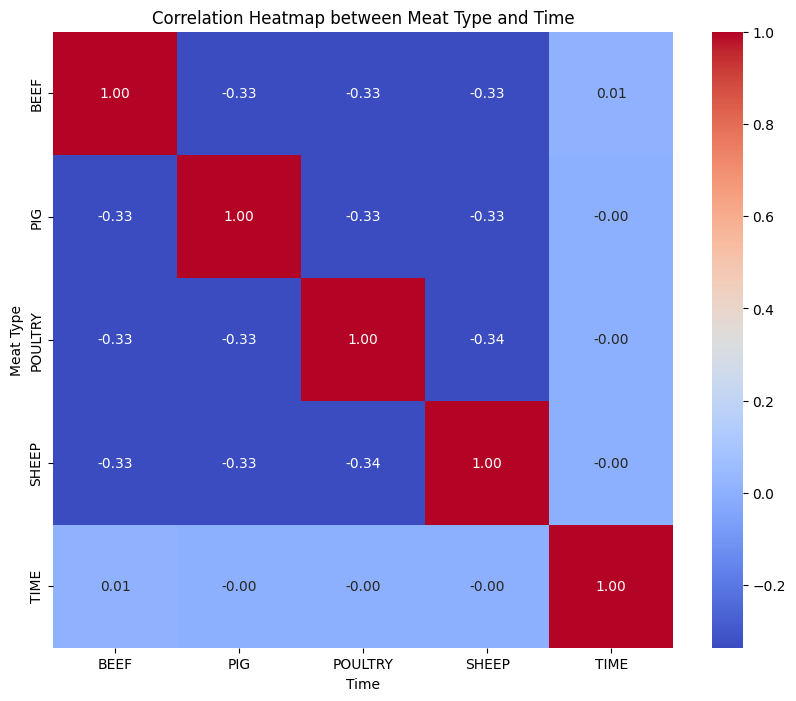

Correlation between Meat Type and Time:
BEEF: 0.008698389922247632
PIG: -0.0010953228922390501
POULTRY: -0.0037775436914895158
SHEEP: -0.0037775436914832994


In [32]:
# One-hot encode the 'SUBJECT' column
encoded_dMeat = pd.get_dummies(dMeat['SUBJECT'])

# Combine encoded 'SUBJECT' column with 'TIME' column
data = pd.concat([encoded_dMeat, dMeat['TIME']], axis=1)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Meat Type and Time')
plt.xlabel('Time')
plt.ylabel('Meat Type')
plt.show()

# Print correlation for each meat type and time
print("Correlation between Meat Type and Time:")
for meat_type in encoded_dMeat.columns:
    correlation_with_time = correlation_matrix.loc[meat_type, 'TIME']
    print(f"{meat_type}: {correlation_with_time}")

<Figure size 1200x1000 with 0 Axes>

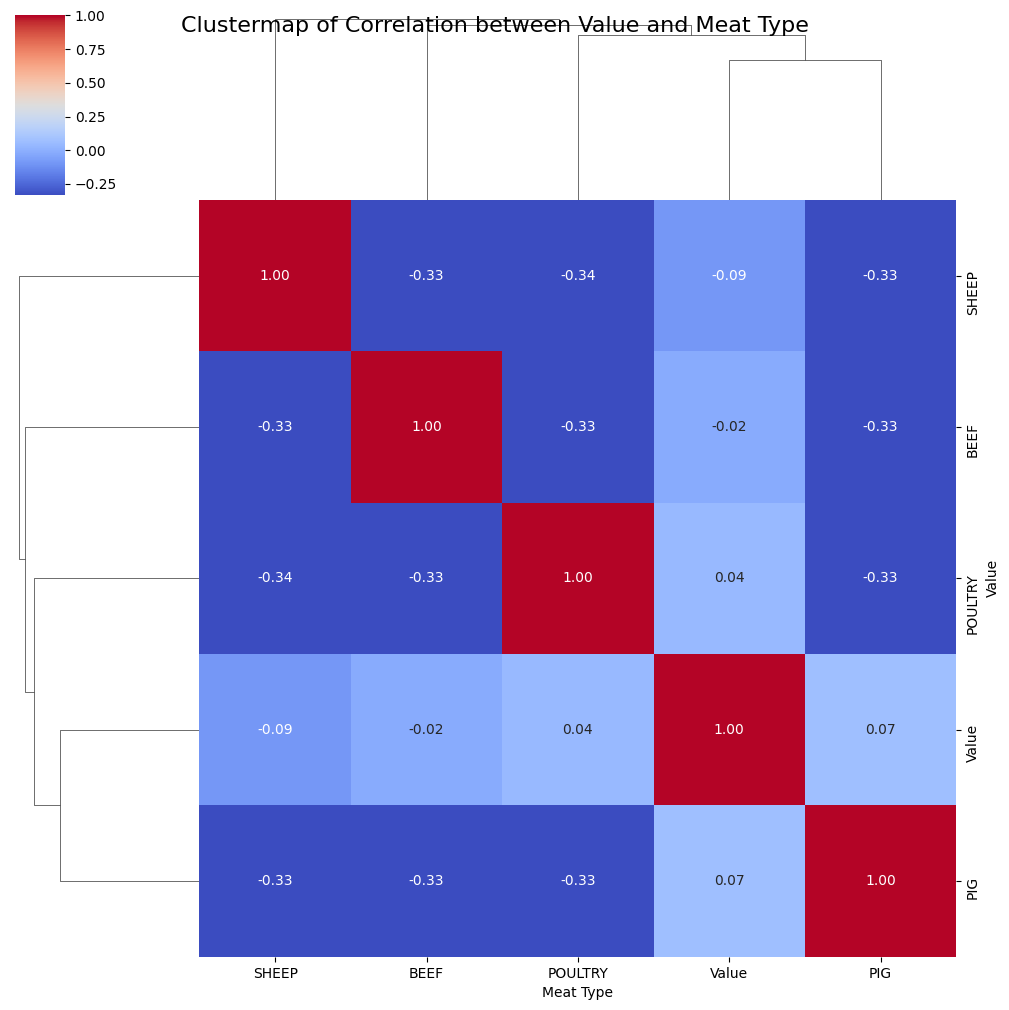

In [33]:
# One-hot encode the 'SUBJECT' column
encoded_dMeat = pd.get_dummies(dMeat['SUBJECT'])

# Combine encoded 'SUBJECT' column with 'Value' column
data = pd.concat([dMeat['Value'], encoded_dMeat], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the clustermap
plt.figure(figsize=(12, 10))
cluster_map = sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Add explanation labels to the clustermap
cluster_map.ax_heatmap.set_xlabel('Meat Type')
cluster_map.ax_heatmap.set_ylabel('Value')
cluster_map.fig.suptitle('Clustermap of Correlation between Value and Meat Type', fontsize=16)
plt.show()